<a href="https://colab.research.google.com/github/nek96/t-SNE_Dimensionality-reduction-method-applying-on-Glove.50d.text-2000-words-vector-/blob/main/PCA%2Ct_SNE%2CUMAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PCA Trustworthiness: 0.6631
PCA Continuity: 0.8621
PCA Mean Squared Error (MSE): 45.9838


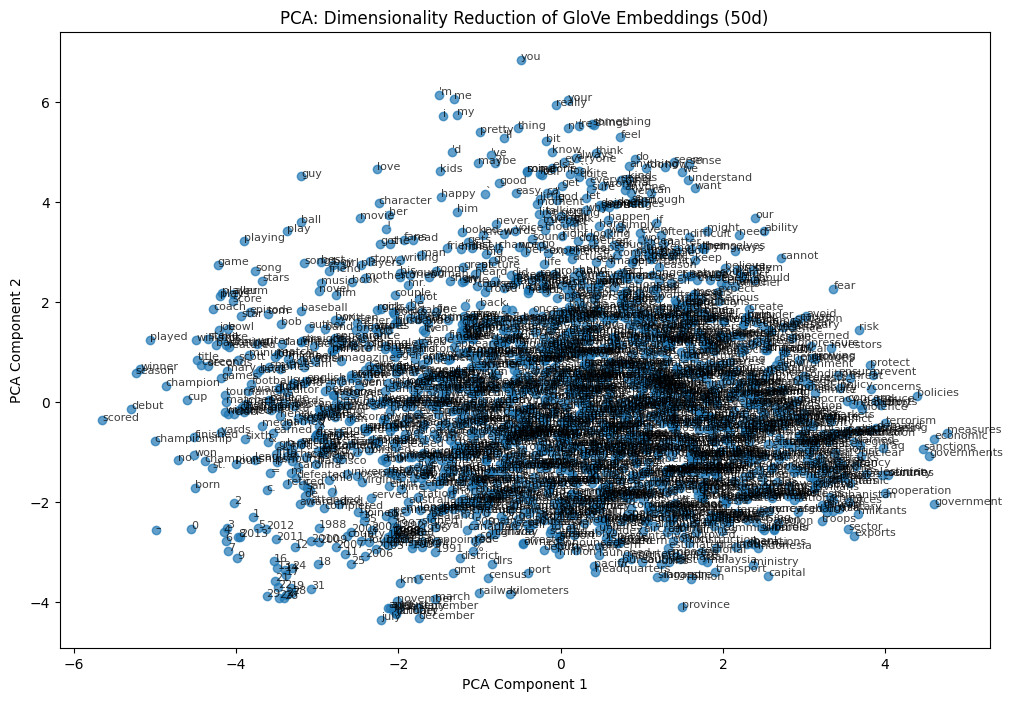

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances, mean_squared_error
from sklearn.manifold import trustworthiness

# GloVe Data Loader
class GloVeLoader:
    def __init__(self, file_path, max_words=2000):
        self.file_path = file_path
        self.max_words = max_words

    def load(self):
        """Load and normalize GloVe embeddings"""
        words, vectors = [], []
        with open(self.file_path, 'r', encoding='utf-8') as f:
            for idx, line in enumerate(f):
                if idx >= self.max_words:
                    break
                parts = line.strip().split()
                words.append(parts[0])
                vectors.append(np.array(parts[1:], dtype=np.float32))

        vectors = np.array(vectors)
        return words, vectors

# Path to the GloVe embeddings file (update the path to your local file)
glove_file_path = 'glove.6B.50d.txt'

# Load the GloVe embeddings
loader = GloVeLoader(glove_file_path, max_words=2000)
words, vectors = loader.load()

# Standardize the data
scaler = StandardScaler()
vectors_std = scaler.fit_transform(vectors)

# Apply PCA
pca = PCA(n_components=2)
vectors_pca = pca.fit_transform(vectors_std)

# Calculate characteristics
trustworthiness_score = trustworthiness(vectors_std, vectors_pca)
continuity_score = trustworthiness(vectors_pca, vectors_std)
mse_score = mean_squared_error(pairwise_distances(vectors_std), pairwise_distances(vectors_pca))

print(f"PCA Trustworthiness: {trustworthiness_score:.4f}")
print(f"PCA Continuity: {continuity_score:.4f}")
print(f"PCA Mean Squared Error (MSE): {mse_score:.4f}")

# Visualization
plt.figure(figsize=(12, 8))
plt.scatter(vectors_pca[:, 0], vectors_pca[:, 1], alpha=0.7)
for i, word in enumerate(words):
    plt.annotate(word, (vectors_pca[i, 0], vectors_pca[i, 1]), fontsize=8, alpha=0.75)
plt.title('PCA: Dimensionality Reduction of GloVe Embeddings (50d)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


PCA Trustworthiness: 0.6631
PCA Continuity: 0.8621
PCA Mean Squared Error (MSE): 45.9838
t-SNE Trustworthiness: 0.9566
t-SNE Continuity: 0.9158
t-SNE Mean Squared Error (MSE): 1856.0118


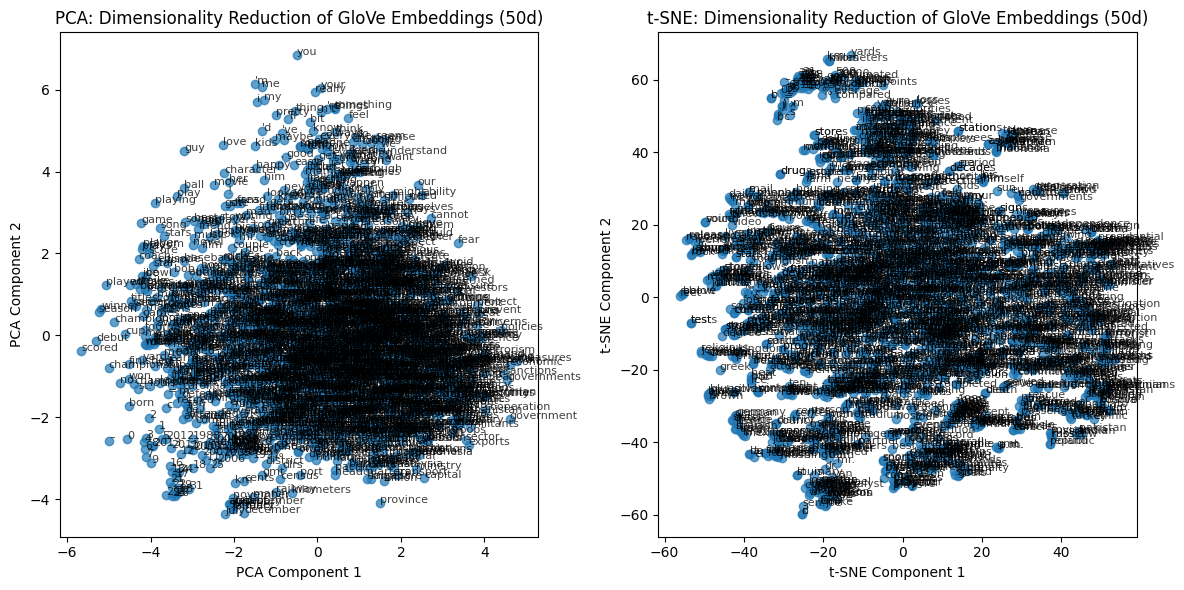

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances, mean_squared_error
from sklearn.manifold import trustworthiness

# GloVe Data Loader
class GloVeLoader:
    def __init__(self, file_path, max_words=2000):
        self.file_path = file_path
        self.max_words = max_words

    def load(self):
        """Load and normalize GloVe embeddings"""
        words, vectors = [], []
        with open(self.file_path, 'r', encoding='utf-8') as f:
            for idx, line in enumerate(f):
                if idx >= self.max_words:
                    break
                parts = line.strip().split()
                words.append(parts[0])
                vectors.append(np.array(parts[1:], dtype=np.float32))

        vectors = np.array(vectors)
        return words, vectors

# Path to the GloVe embeddings file (update the path to your local file)
glove_file_path = 'glove.6B.50d.txt'

# Load the GloVe embeddings
loader = GloVeLoader(glove_file_path, max_words=2000)
words, vectors = loader.load()

# Standardize the data
scaler = StandardScaler()
vectors_std = scaler.fit_transform(vectors)

# Apply PCA
pca = PCA(n_components=2)
vectors_pca = pca.fit_transform(vectors_std)

# Apply t-SNE
tsne = TSNE(n_iter=1000, learning_rate=200, n_components=2, perplexity=30, random_state=42)
vectors_tsne = tsne.fit_transform(vectors_std)

# Calculate characteristics for PCA
trustworthiness_pca = trustworthiness(vectors_std, vectors_pca)
continuity_pca = trustworthiness(vectors_pca, vectors_std)
mse_pca = mean_squared_error(pairwise_distances(vectors_std), pairwise_distances(vectors_pca))

print(f"PCA Trustworthiness: {trustworthiness_pca:.4f}")
print(f"PCA Continuity: {continuity_pca:.4f}")
print(f"PCA Mean Squared Error (MSE): {mse_pca:.4f}")

# Calculate characteristics for t-SNE
trustworthiness_tsne = trustworthiness(vectors_std, vectors_tsne)
continuity_tsne = trustworthiness(vectors_tsne, vectors_std)
mse_tsne = mean_squared_error(pairwise_distances(vectors_std), pairwise_distances(vectors_tsne))

print(f"t-SNE Trustworthiness: {trustworthiness_tsne:.4f}")
print(f"t-SNE Continuity: {continuity_tsne:.4f}")
print(f"t-SNE Mean Squared Error (MSE): {mse_tsne:.4f}")

# Visualization for PCA
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(vectors_pca[:, 0], vectors_pca[:, 1], alpha=0.7)
for i, word in enumerate(words):
    plt.annotate(word, (vectors_pca[i, 0], vectors_pca[i, 1]), fontsize=8, alpha=0.75)
plt.title('PCA: Dimensionality Reduction of GloVe Embeddings (50d)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

# Visualization for t-SNE
plt.subplot(1, 2, 2)
plt.scatter(vectors_tsne[:, 0], vectors_tsne[:, 1], alpha=0.7)
for i, word in enumerate(words):
    plt.annotate(word, (vectors_tsne[i, 0], vectors_tsne[i, 1]), fontsize=8, alpha=0.75)
plt.title('t-SNE: Dimensionality Reduction of GloVe Embeddings (50d)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')

plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


UMAP Trustworthiness: 0.9020
UMAP Continuity: 0.9357
UMAP Mean Squared Error (MSE): 44.4447


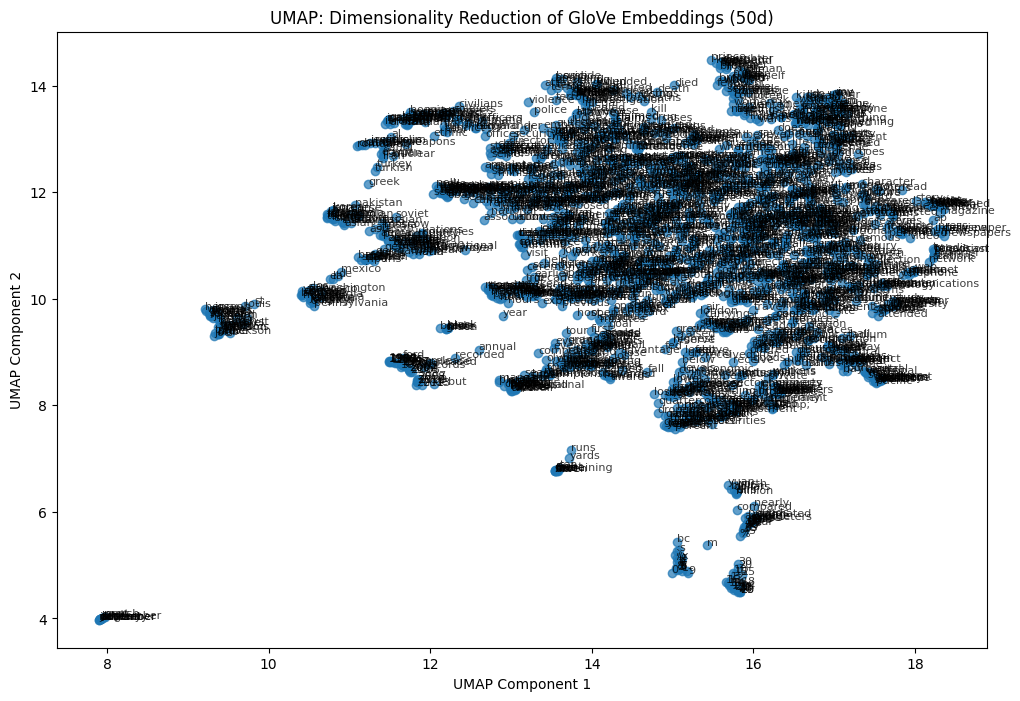

In [18]:
import umap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances, mean_squared_error
from sklearn.manifold import trustworthiness
from sklearn.preprocessing import StandardScaler

# GloVe Data Loader
class GloVeLoader:
    def __init__(self, file_path, max_words=2000):
        self.file_path = file_path
        self.max_words = max_words

    def load(self):
        """Load and normalize GloVe embeddings"""
        words, vectors = [], []
        with open(self.file_path, 'r', encoding='utf-8') as f:
            for idx, line in enumerate(f):
                if idx >= self.max_words:
                    break
                parts = line.strip().split()
                words.append(parts[0])
                vectors.append(np.array(parts[1:], dtype=np.float32))

        vectors = np.array(vectors)
        return words, vectors

# Path to the GloVe embeddings file (update the path to your local file)
glove_file_path = 'glove.6B.50d.txt'

# Load the GloVe embeddings
loader = GloVeLoader(glove_file_path, max_words=2000)
words, vectors = loader.load()

# Standardize the data
scaler = StandardScaler()
vectors_std = scaler.fit_transform(vectors)

# Apply UMAP
umap_model = umap.UMAP(n_components=2, random_state=42)
vectors_umap = umap_model.fit_transform(vectors_std)

# Calculate characteristics
trustworthiness_umap = trustworthiness(vectors_std, vectors_umap)
continuity_umap = trustworthiness(vectors_umap, vectors_std)
mse_umap = mean_squared_error(pairwise_distances(vectors_std), pairwise_distances(vectors_umap))

print(f"UMAP Trustworthiness: {trustworthiness_umap:.4f}")
print(f"UMAP Continuity: {continuity_umap:.4f}")
print(f"UMAP Mean Squared Error (MSE): {mse_umap:.4f}")

# Visualization for UMAP
plt.figure(figsize=(12, 8))
plt.scatter(vectors_umap[:, 0], vectors_umap[:, 1], alpha=0.7)
for i, word in enumerate(words):
    plt.annotate(word, (vectors_umap[i, 0], vectors_umap[i, 1]), fontsize=8, alpha=0.75)
plt.title('UMAP: Dimensionality Reduction of GloVe Embeddings (50d)')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.show()


In [17]:
!pip install umap-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.6 MB/s eta 0:00:00
